In [1]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#constants
c=2.99792458*1e10 #speed of light in cm/s
c2 = 1.4387769 #second radiation constant, hc/k, in cm*K
T_ref = 276 #HITRAN reference temp in K

In [3]:
earth_infile = '/Users/saravannah/AstroSpec/Exo_Transmit_spectra/earth.txt'
earth_wave, earth_flux = np.loadtxt(earth_infile, unpack=True, skiprows=2)
earth_wave = earth_wave * 1e6

In [4]:
#this is a big file - will take a minute to load it in
hitran_infile = '/Users/saravannah/AstroSpec/Kempton_line_lists/onlyH2O_CO_CO2_CH4/619d10f5.out.txt' #'/Users/saravannah/AstroSpec/Kempton_line_lists/618ec803.out.txt'
nu_spec, S_spec, ID_spec, _, _, _, _, _ = np.loadtxt(hitran_infile, unpack=True)

In [ ]:
def get_partition_function(T, ID):
    

In [ ]:
#energy of lower energy state
#line intensity at T_ref
#HITRAN ID for molecule
def convert_intensity(S_ref, T, lower_energy, ID):
    Q = get_partition_function(T, ID)
    S = S_ref * Q_ref/Q * np.exp(-c2*lower_energy/T)/np.exp(-c2*lower_energy/T_ref) *(1-np.exp(-c2*lower_energy/T))/(1-np.exp(-c2*lower_energy/T_ref))
    
    return S

In [5]:
print(max(S_spec), min(S_spec))
S_threshold = 1e-19
hitran_mini = {'nu':[], 'ID':[]}
for i in range(len(nu_spec)):
    if S_spec[i]>S_threshold:
        hitran_mini['nu'].append(nu_spec[i])
        hitran_mini['ID'].append(ID_spec[i])
        


3.542e-18 1.263e-45


In [6]:
#convert from wavenumber (in inverse cm) to wavelength (in um)
def nu_to_lambda(nu):
    return 1e3*np.reciprocal(nu)

In [7]:
def get_name(ID):
    names = {'1':'H2O', '2':'CO2', '3':'O3','4':'N2O','5':'CO','6':'CH4','7':'O2','8':'NO','9':'SO2',
           '10':'NO2','11':'NH3','12':'HNO3','13':'OH','14':'HF','15':'HCl','16':'HBr','17':'HI','18':'ClO',
           '19':'OCS','20':'H2CO','21':'HOCl','22':'N2','23':'HCN','24':'CH3Cl','25':'H2O2','26':'C2H2',
           '27':'C2H6','28':'PH3', '29':'COF3', '30':'SF6','31':'H2S','32':'HCOOH','33':'HO2','34':'O',
           '35':'ClONO2','36':'NO+','37':'HOBr','38':'C2H4','39':'CH3OH','40':'CH3Br','41':'CH3CN','42':'CF4',
           '43':'C4H2','44':'HC3N','45':'H2','46':'CS','47':'SO3','48':'C2N2','49':'COCl2','50':'SO','51':'CH3F',
           '52':'GeH4','53':'CS2','54':'CH3I','55':'NF3'}
    molec_name = names[str(int(ID))]
    return molec_name

In [8]:
#check if there's an absorption line very close by
def is_line_nearby(wavelength, waves):
    threshold = 1e-1 #distance in um to next absorption line
    idx = waves.index(wavelength)
    
    #check if the next larger line is close enough
    if idx < len(waves)-1 and abs(wavelength - waves[waves.index(wavelength)+1]) < threshold:
        return True
    else:
        return False

In [9]:
##NOTE: use this only for molecules of the same type!!!! 

def get_bands(waves):
    
    bands = [] #this is a list of the **centers** of each band
    band_widths = []
    current_band = [] #this is a list of all the individual lines inside the current band
    
    for wavelength in waves:
        if wavelength not in current_band and is_line_nearby(wavelength, waves):
            current_band.append(wavelength)
        #if the last wavelength was in the current band, add the center of that band to bands and reset
        elif waves[waves.index(wavelength) -1] in current_band:
            band_center = np.mean(current_band)
            band_width = [current_band[0], current_band[len(current_band)-1]]
            bands.append(band_center)
            band_widths.append(band_width)
            current_band = [] #reset current band
    return bands, band_widths

In [10]:
#get all waves of the same ID/type
def get_type(data, ID):
    waves_arr = []
    for i in range(len(data['ID'])):
        if get_name(data['ID'][i]) == ID:
            waves_arr.append(nu_to_lambda(data['nu'][i]))

    return waves_arr
        

In [11]:
H2O = get_type(hitran_mini, 'H2O')
H2O_bands, H2O_band_widths = get_bands(H2O)

CH4 = get_type(hitran_mini, 'CH4')
CH4_bands, CH4_band_widths = get_bands(CH4)

In [12]:
print(len(H2O_bands), len(H2O))

9 69


In [13]:
test1, test2 = H2O_band_widths[2]

print(test1)

4.511163856140158


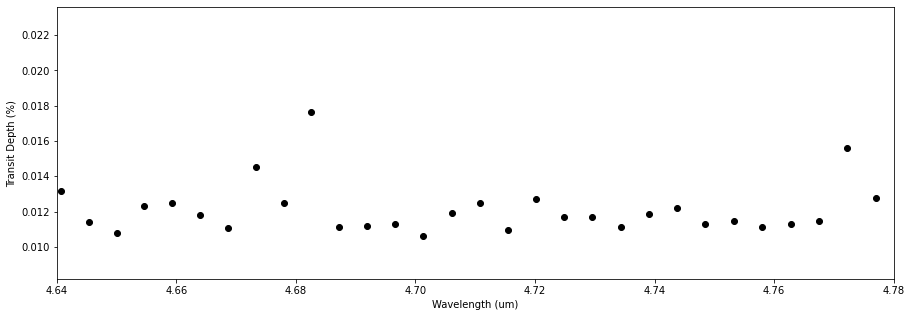

In [19]:
plt.scatter(earth_wave, earth_flux, color='black')
plt.xlabel('Wavelength (um)')
plt.ylabel('Transit Depth (%)')
plt.xlim([4.64,4.78])
plt.gcf().set_size_inches(15, 5)

In [14]:
#names_to_plot = ['H2O', 'CO', 'CO2', 'CH4']
names_to_plot = ['CH4']

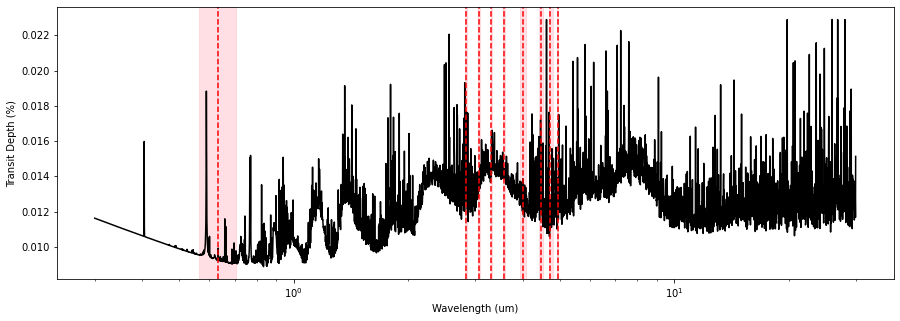

In [21]:
plt.plot(earth_wave, earth_flux, color='black')
for i in range(len(H2O_bands)):
    beg, end = H2O_band_widths[i]
    plt.axvline(H2O_bands[i],color='red', linestyle='dashed')
    plt.axvspan(beg, end, alpha=0.5, color = 'pink')

plt.xscale('log')
plt.xlabel('Wavelength (um)')
plt.ylabel('Transit Depth (%)')
#plt.xlim([0,8])
plt.gcf().set_size_inches(15, 5)

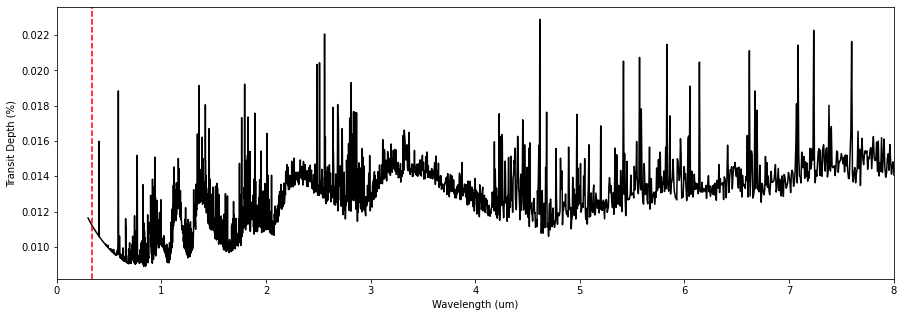

In [15]:
plt.plot(earth_wave, earth_flux, color='black')
for i in range(len(CH4_bands)):
    beg, end = CH4_band_widths[i]
    plt.axvline(CH4_bands[i],color='red', linestyle='dashed')
    plt.axvspan(beg, end, alpha=0.5, color = 'pink')

#plt.xscale('log')
plt.xlabel('Wavelength (um)')
plt.ylabel('Transit Depth (%)')
plt.xlim([0,8])
plt.gcf().set_size_inches(15, 5)


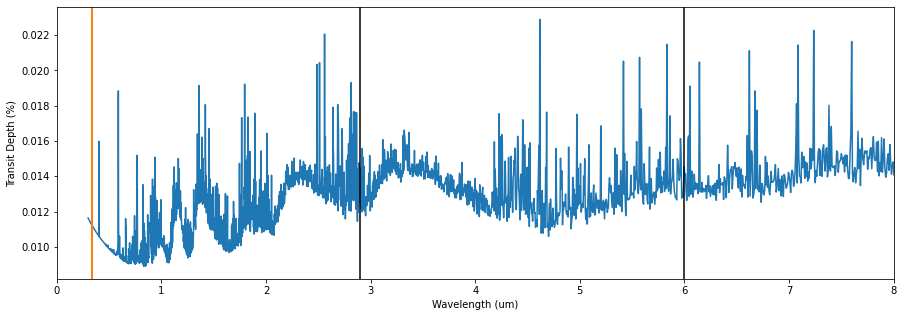

In [16]:
plt.plot(earth_wave, earth_flux)
##this also takes a minute - drawing vertical lines is expensive in Python
#for i,mywave in enumerate(hitran_mini['nu']):
#    plt.axvline(nu_to_lambda(hitran_mini['nu'][i]),color='C1')
#    plt.text(nu_to_lambda(hitran_mini['nu'][i]),0.02,get_name(hitran_mini['ID'][i]))

for i, mywave in enumerate(hitran_mini['nu']):
    if get_name(hitran_mini['ID'][i]) in names_to_plot:
        plt.axvline(nu_to_lambda(hitran_mini['nu'][i]),color='C1')
        #plt.text(nu_to_lambda(hitran_mini['nu'][i]),0.02,get_name(hitran_mini['ID'][i]))
        


#plt.xscale('log')
plt.axvline(6, color='black') 
plt.axvline(2.9, color='black') #X band
plt.xlabel('Wavelength (um)')
plt.ylabel('Transit Depth (%)')
plt.xlim([0,8])
plt.gcf().set_size_inches(15, 5)

In [17]:
inc = 0
for i, mywave in enumerate(hitran_mini['nu']):
    if get_name(hitran_mini['ID'][i]) in names_to_plot:
        inc = inc+1
print(inc)

4
